# Consumer Credit Risk

## Overview
The data frame contains of 10k customers having records of whether customers defaulted on their credit card debt or not. We can break down the data frame into 4 variables:
- Default:  A factor with levels No and Yes indicating whether the customer defaulted on their debt.
- Student:  A factor with levels No and Yes indicating whether the customer is a student.
- Balance:  The average balance that the customer has remaining on their credit card after making their monthly payment.
- Income:   Montlhy Income of customer.

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color= sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")



#### Importing the dataset


In [11]:
Default = pd.read_csv("Default (1).csv")

In [12]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [60]:
Default.tail()

,default,student,balance,income
9995,No,No,711.56,52992.38
9996,No,No,757.96,19660.72
9997,No,No,845.41,58636.16
9998,No,No,1569.01,36669.11
9999,No,Yes,200.92,16862.95


#### The number of rows (observations) and the number of columns (variables).


In [5]:
Default.shape

(10000, 4)

#### The basic measures of descriptive statistics for the continuous variables.

In [7]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


In [8]:
#Concept of random
data1 = np.random.normal(0, 6, 10)
data2 = np.random.normal(0, 7, 10)
data3 = np.random.normal(0, 8, 10)
data4 = np.random.normal(0, 9, 10)
data = list([data1, data2, data3, data4])

In [9]:
data1

array([-0.77964525,  7.29480009,  4.97941688, -2.48727976,  2.10787896,
        0.92858357, -3.6380072 ,  1.93772234, 12.23131725, -7.47821701])

In [10]:
data

[array([-0.77964525,  7.29480009,  4.97941688, -2.48727976,  2.10787896,
         0.92858357, -3.6380072 ,  1.93772234, 12.23131725, -7.47821701]),
 array([-1.77767193,  6.14663735, -9.46702375, 16.79886621, -6.81647598,
        -8.55887016, -5.66741626, -1.95794268,  4.91002291,  0.08555655]),
 array([ -9.9179308 ,   9.15664314, -10.04442826,   4.09957676,
          8.4768283 ,  13.94002844,  -9.87536641,   2.82891856,
          6.49134325, -13.33157535]),
 array([ -9.63470422,   9.8625118 , -21.20380559,  -0.34240002,
         -2.77581092,  -4.1608934 ,  -3.13167681,   0.55313725,
         -1.29573874,   8.16123787])]

#### Creating Boxplots

In [27]:
Income_Balance = list([Default.balance,Default.income])
Income_Balance

[0        729.53
 1        817.18
 2       1073.55
 3        529.25
 4        785.66
          ...   
 9995     711.56
 9996     757.96
 9997     845.41
 9998    1569.01
 9999     200.92
 Name: balance, Length: 10000, dtype: float64,
 0       44361.63
 1       12106.13
 2       31767.14
 3       35704.49
 4       38463.50
           ...   
 9995    52992.38
 9996    19660.72
 9997    58636.16
 9998    36669.11
 9999    16862.95
 Name: income, Length: 10000, dtype: float64]

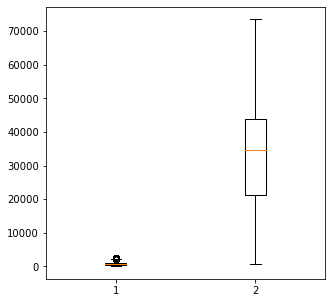

In [23]:
plt.figure(figsize=(5,5))
plt.boxplot(Income_Balance)
plt.show()

#### Univariate Analysis: Balance & Income variables

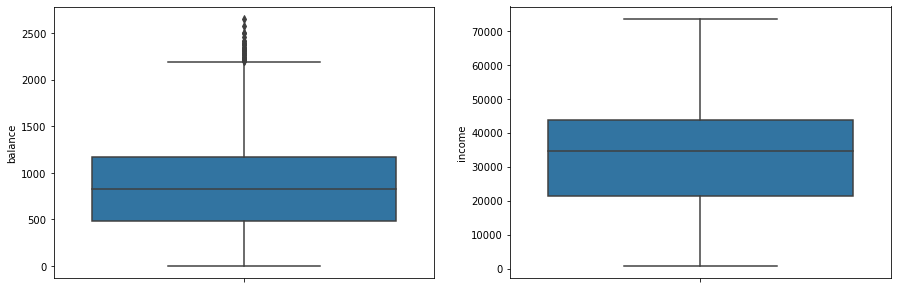

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

#### Records having Balance more than 2200, getting an idea of outliers

In [33]:
BalanceMoreThan2200= Default[Default["balance"]>2200]
BalanceMoreThan2200

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


#### Univariate Analysis: Student & Default variables

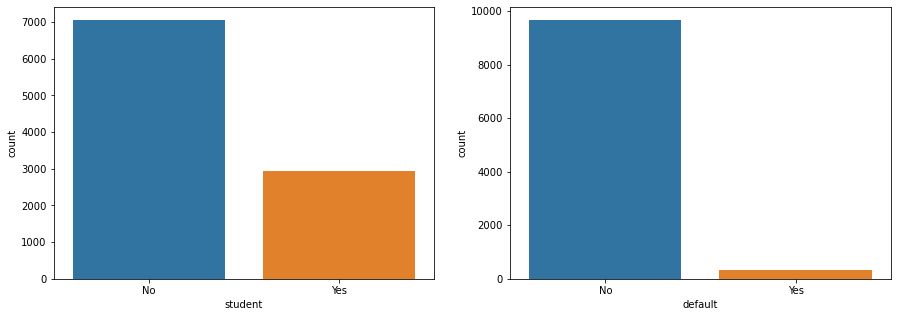

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()

In [36]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


 #### The basic measures of descriptive statistics for the categorical variables.

In [38]:
Default['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [39]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [78]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


#### Checking proportion of student

In [79]:
Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

#### Checking proportion of default

In [80]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

Data seems highly imbalanced

#### Bivariate Analysis: Default Vs. other variables

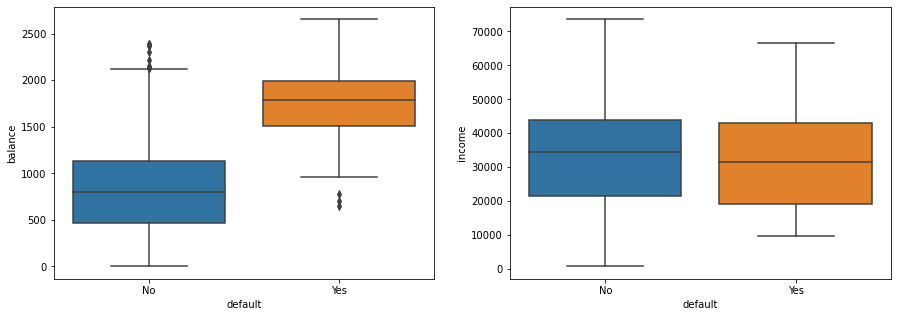

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(Default["default"],Default["balance"])

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default["income"])
plt.show()

##### Inference: 
Defaulters seem to have higher outstanding balance compared non-defaulters.
Defaulters' income seems lower compared to non-defaulters.

In [45]:
#Creating a cross tabulation
pd.crosstab(Default['student'],Default['default'], normalize="index").round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


In [47]:
#Checking the records having balance less than 0
BalanceLessThan0= Default[Default["balance"]<0]
BalanceLessThan0

,default,student,balance,income


#### Check for correlation between independent variables

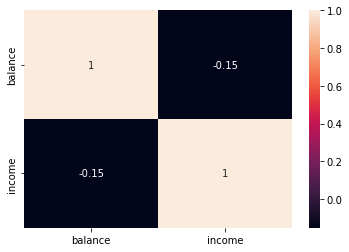

In [48]:
sns.heatmap(Default[['balance', 'income']].corr(), annot = True)
plt.show()

#### Checking for missing values

In [49]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

There are no missing values in the dataset.

#### Treating outliers present in the 'balance' variable

In [50]:
Q1,Q3=Default['balance'].quantile([.25,.75])
IQR=Q3-Q1
LL=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [85]:
UL

2193.16375

In [86]:
df=Default[Default['balance']>UL]

In [87]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [88]:
df['default'].count()

31

In [89]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [90]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

Note: We have 31 outliers in total, of which 84%(approx 26 in number) are with a default status 1. As such we have only 333 default instances in our data therefore dropping these 26 i.e. 8% will not be a good option. 

In [51]:
Default['balance']=np.where(Default['balance']>UL,UL,Default['balance'])

In [52]:
ShowOutliersFixed=Default[Default['balance']>UL] 

In [53]:
ShowOutliersFixed

,default,student,balance,income


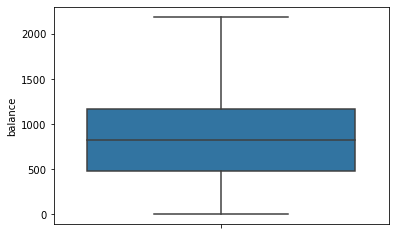

In [55]:
sns.boxplot(y=Default['balance'])
plt.show()

Outliers have been replaced

In [56]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


#### Converting Categorical Variables to Numeric variables

In [58]:
Default=pd.get_dummies(Default,drop_first = True)

In [59]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


#### Updating the column names

In [62]:

Default.columns=['balance','income','default','student']

In [63]:
Default.head()

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


#### Importing function train_test_split from Sklearn model selection

In [65]:
from sklearn.model_selection import train_test_split

In [68]:
X=Default.drop('default',axis=1)
y=Default['default']

#### Splitting data arrays into two subsets: for training data and for testing data. 

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [108]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


#### Using Stratify Sampling, equally split data into train and test set 

In [71]:
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


Training set has 97% non defaulters and 3% defaulters and same with test set.

#### Treating target imbalance using SMOTE 

In [73]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy=0.75) 
X_res,y_res=sm.fit_resample(X_train, y_train)

In [74]:
!pip install imblearn

In [75]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy=0.75) 
X_res,y_res=sm.fit_resample(X_train, y_train) 

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lg=LogisticRegression()

In [79]:
#Creating object or instance
lg.fit(X_res,y_res)

LogisticRegression()

#### Fitting the model on the training set

In [89]:
lg.fit(X_res,y_res)

LogisticRegression()

In [90]:
y_pred=lg.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix

#### Creating a Confusion Matrix

In [92]:
confusion_matrix(y_test,y_pred)

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [94]:
Accuracy = (2589+75)/(311+25+2589+75)
Accuracy

0.888

#### Financial Data Analytics > EDA > Implemented logistic Regression model > Accuracy of the model = 88%